# Tugas AI Pribadi - IF.B Sore

### Introduction
<p>NIM : <b>221110680</b></p>
<p>Name : <b>Samuel Onasis</b></p>

### Brief Overview
<p>Implemented model : </p>
<ul>
    <li> <p> [ ] Supervised Models</p>
    <ul>
        <li> [x] Decision Tree </li>
        <li> [x] K-Nearest Neighbour </li>
        <li> [ ] Support Vector Machine </li>
        <li> [ ] Support Vector Regression </li>
        <li> [x] Long Short Term Memory </li>
    </ul>
    &nbsp
    <li> <p> [x] Unsupervised Models</p>
    <ul>
        <li> [x] K-Means </li>
    </ul>
    &nbsp
    <li> [x] Choosen models </li>
    <ul>
        <li>[x] Logistic Regression</li>
        <li>[x] Naive Bayes</li>
    </ul>


</ul>


## Getting Started

### Importing global packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Reading data

In [2]:
df = pd.read_csv('data_balita.csv')
df.head(5)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


## Decision Tree

### Importing local packages

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Re-mapping the data to a quantitative data

In [4]:
new_df = df.copy(deep=True)
gender = {'perempuan':0, 'laki-laki':1}
new_df['Jenis Kelamin'] = new_df['Jenis Kelamin'].map(gender)

result = {
    'normal' : 0,
    'severely stunted' : 1,
    'tinggi' : 2,
    'stunted' : 3
}

new_df['Status Gizi'] = new_df['Status Gizi'].map(result)

new_df['Umur (bulan)'] = new_df['Umur (bulan)'].map(lambda x: int(x/10))

new_df["Tinggi Badan (cm)"] = new_df["Tinggi Badan (cm)"].map(lambda x: int(x/10))

new_df.head(5)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,1,4,3
1,0,1,5,2
2,0,1,4,0
3,0,1,4,0
4,0,1,4,1


### Declaring the gain determiner

In [5]:
columns = ['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']

X = new_df[columns]
y = new_df['Status Gizi']

### Constructing the decision tree

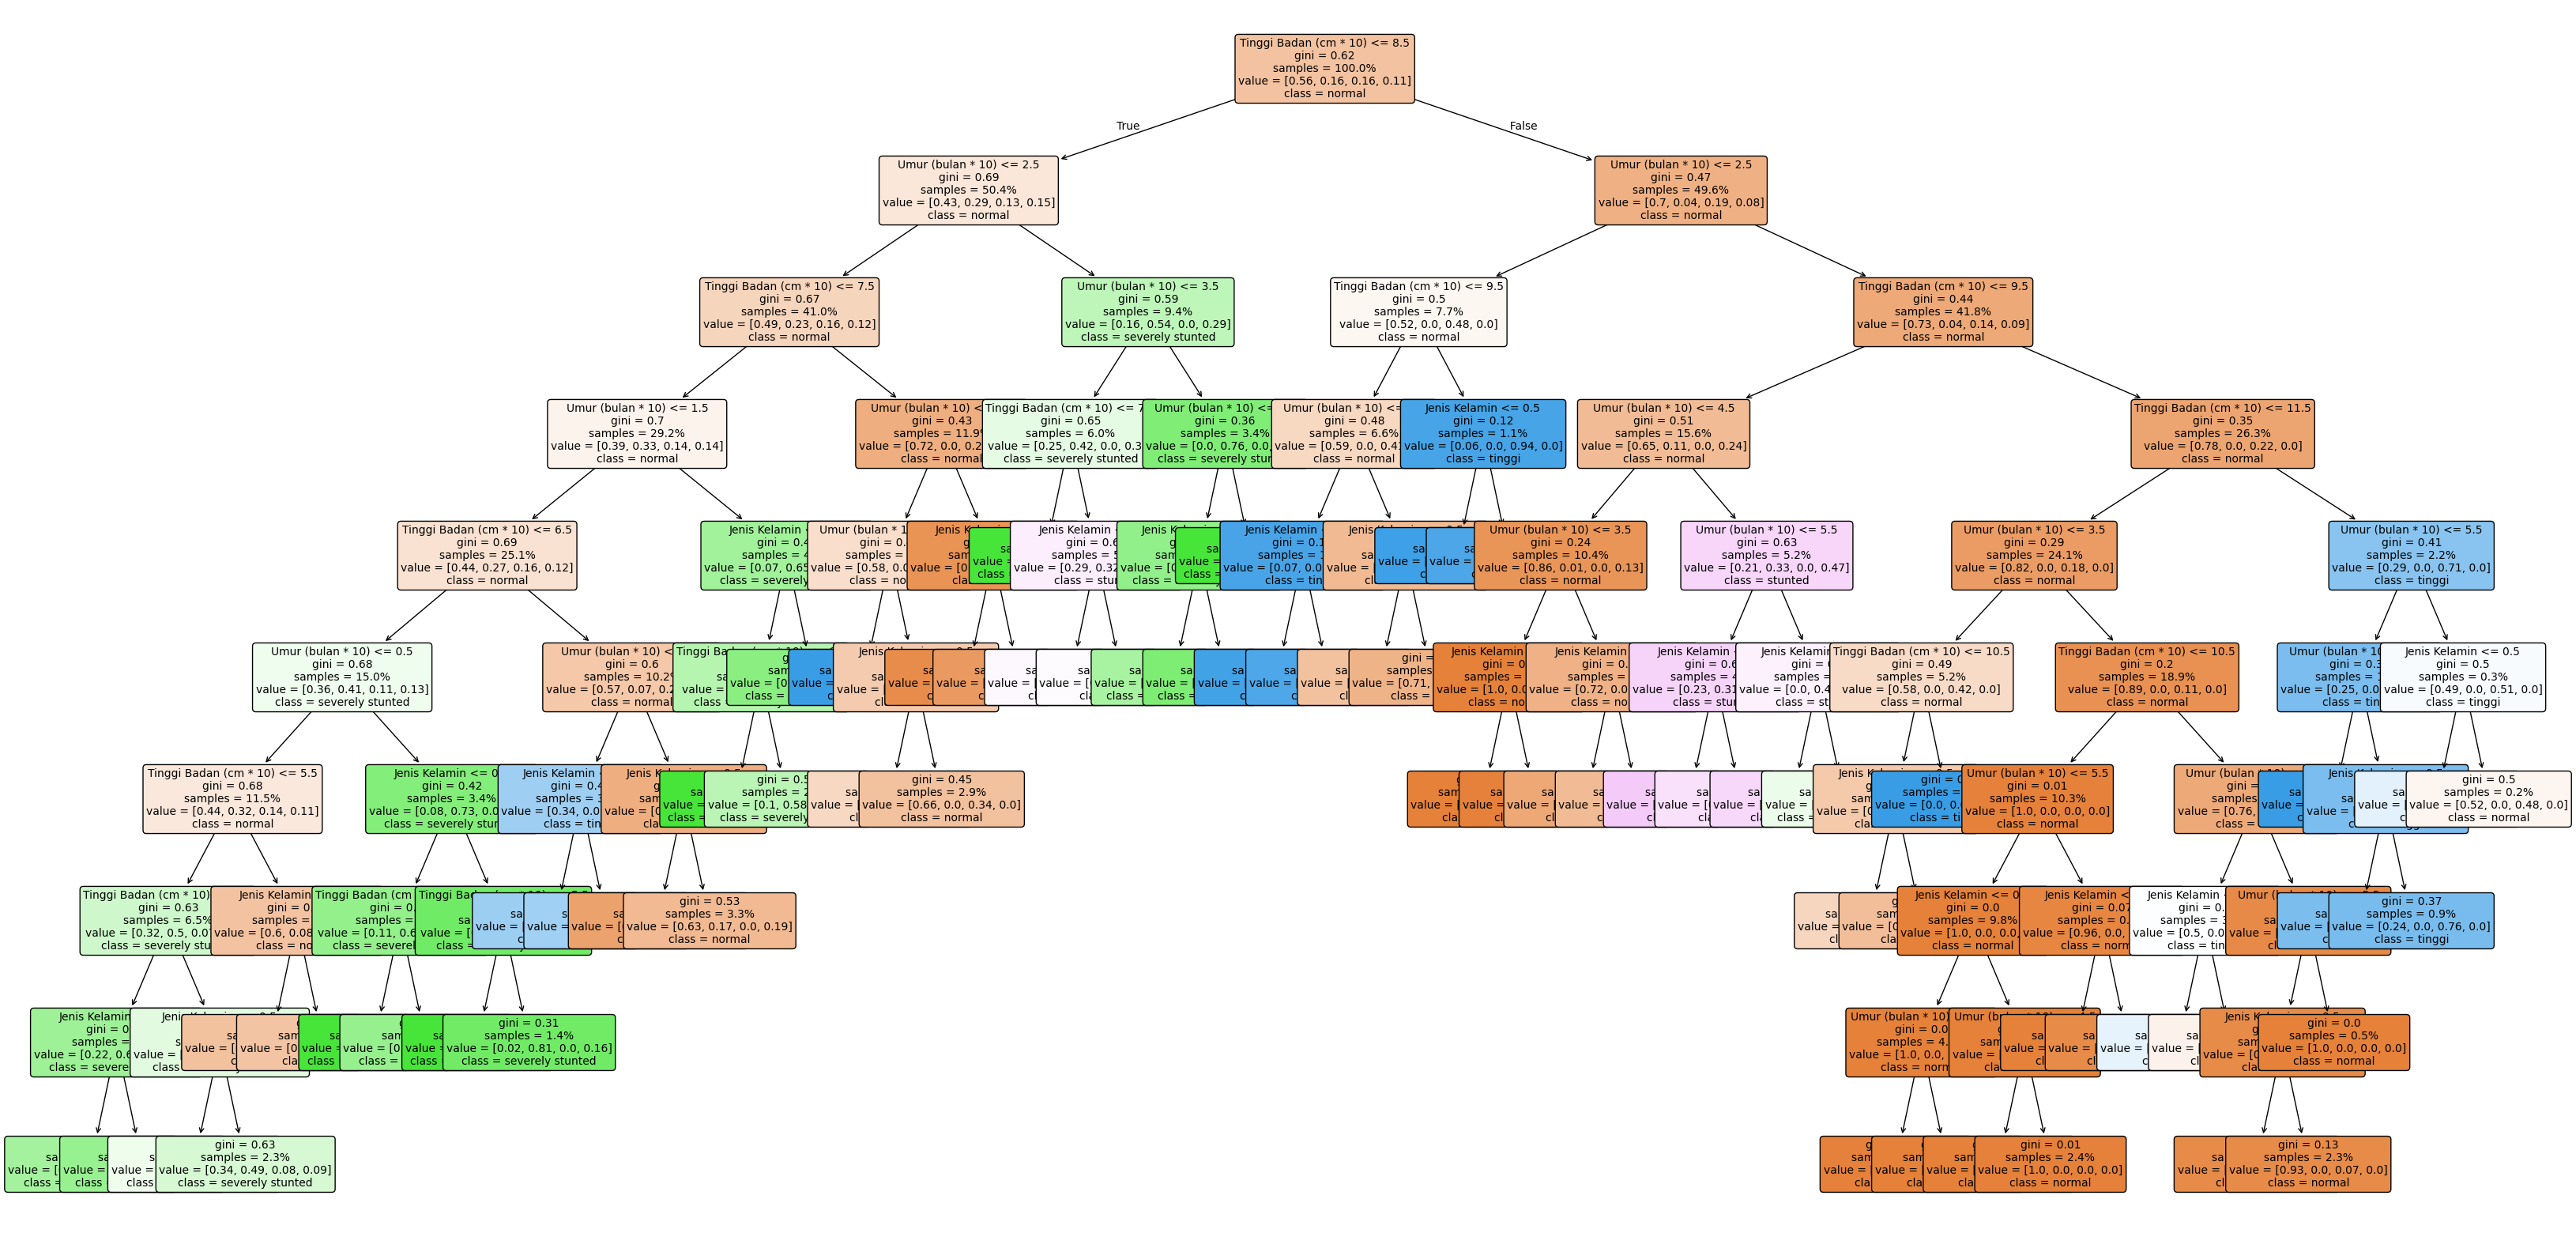

In [6]:
plt.figure(figsize=(40, 20))

decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(X, y)

labels = ['Umur (bulan * 10)', 'Jenis Kelamin', 'Tinggi Badan (cm * 10)']
tree.plot_tree(decisionTree, filled=True, feature_names=labels, class_names=['normal', 'severely stunted', 'tinggi', 'stunted'],fontsize=10, rounded=True, proportion=True, precision=2)

plt.show()

Notes : Decision tree result will always be vary, since decision tree doesn't give a biased answer, and is based on the probability of the outcome. Even when it's fed with the same data, it's result will vary.

### Decision Tree Data Prediction

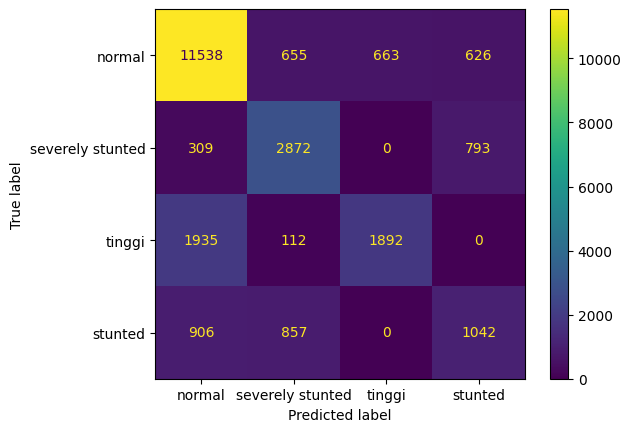

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

predicted = decisionTree.predict(X_test)


confusion_matrix = metrics.confusion_matrix(y_test, predicted)

confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'severely stunted', 'tinggi', 'stunted'])

confusion_matrix_display.plot()

plt.show()

### Decision Tree Accuracy

In [8]:
metrics_accuracy = metrics.accuracy_score(y_test, predicted) * 100 
metrics_precision = metrics.precision_score(y_test, predicted, average='weighted') * 100
metrics_recall = metrics.recall_score(y_test, predicted, average='weighted') * 100
metrics_f1_score = metrics.f1_score(y_test, predicted, average='weighted') * 100

print(f"Metrics Accuracy : {metrics_accuracy:.2f}%")
print(f"Metrics Precision : {metrics_precision:.2f}%")
print(f"Metrics Recall : {metrics_recall:.2f}%")
print(f"Metrics F1 Score : {metrics_f1_score:.2f}%")

Metrics Accuracy : 71.67%
Metrics Precision : 71.21%
Metrics Recall : 71.67%
Metrics F1 Score : 70.84%


## kNN (k-Nearest Neighbour)

### Importing local packages

In [9]:
from sklearn.neighbors import KNeighborsClassifier

### Re-mapping dataframe

In [10]:
new_df = df.copy(deep=True)

gender = {'perempuan':0, 'laki-laki':1}

result = {
    'normal' : 0,
    'severely stunted' : 1,
    'tinggi' : 2,
    'stunted' : 3
}

new_df['Jenis Kelamin'] = new_df['Jenis Kelamin'].map(gender)
new_df["Status Gizi"] = new_df['Status Gizi'].map(result)
new_df['Umur (bulan)'] = new_df['Umur (bulan)'].map(lambda x: int(x/10))
new_df["Tinggi Badan (cm)"] = new_df["Tinggi Badan (cm)"].map(lambda x: int(x/10))

x = new_df['Umur (bulan)']
y = new_df['Tinggi Badan (cm)']
z = new_df['Jenis Kelamin']

classes = new_df['Status Gizi']

### Constructing k-Nearest Neighbour

In [11]:
data = list(zip(x,y,z))
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=2)

### kNN Data Prediction

/home/samuel/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


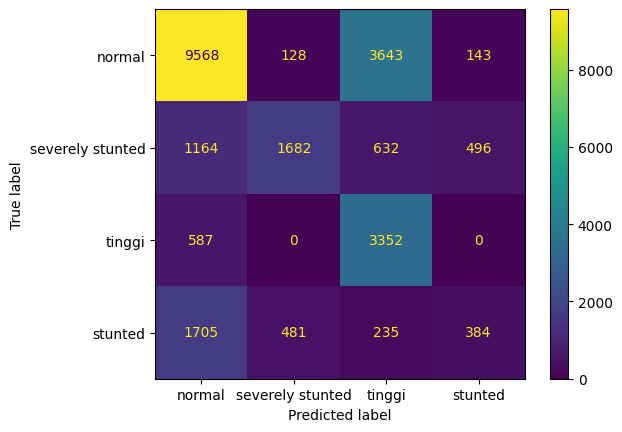

In [12]:
columns = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Jenis Kelamin']
X = new_df[columns]
y = new_df['Status Gizi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

predicted = knn.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, predicted)

confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'severely stunted', 'tinggi', 'stunted'])

confusion_matrix_display.plot()

plt.show()

### kNN Accuracy

In [13]:
metrics_accuracy = metrics.accuracy_score(y_test, predicted) * 100 
metrics_precision = metrics.precision_score(y_test, predicted, average='weighted') * 100
metrics_recall = metrics.recall_score(y_test, predicted, average='weighted') * 100
metrics_f1_score = metrics.f1_score(y_test, predicted, average='weighted') * 100

print(f"Metrics Accuracy : {metrics_accuracy:.2f}%")
print(f"Metrics Precision : {metrics_precision:.2f}%")
print(f"Metrics Recall : {metrics_recall:.2f}%")
print(f"Metrics F1 Score : {metrics_f1_score:.2f}%")

Metrics Accuracy : 61.93%
Metrics Precision : 64.27%
Metrics Recall : 61.93%
Metrics F1 Score : 60.61%


## SVM (Support Vector Model)

### Importing local packages

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

### Re-mapping dataframe

In [15]:
new_df = df.copy(deep=True)

gender = {'perempuan':0, 'laki-laki':1}

result = {
    'normal' : 0,
    'severely stunted' : 1,
    'tinggi' : 2,
    'stunted' : 3
}

new_df['Jenis Kelamin'] = new_df['Jenis Kelamin'].map(gender)
new_df["Status Gizi"] = new_df['Status Gizi'].map(result)
new_df['Umur (bulan)'] = new_df['Umur (bulan)'].map(lambda x: int(x/10))
new_df["Tinggi Badan (cm)"] = new_df["Tinggi Badan (cm)"].map(lambda x: int(x/10))

x = new_df['Umur (bulan)']
y = new_df['Tinggi Badan (cm)']
z = new_df['Jenis Kelamin']

classes = new_df['Status Gizi']

### Fitting SVM models

In [16]:
columns = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Jenis Kelamin']
X = new_df[columns]
y = new_df['Status Gizi']

svm = SVC(kernel = "rbf", gamma=0.5, C=1.0)

# svm.fit(X,y)

### Constructing SVM models

In [17]:
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# h = (x_max / x_min)/100
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# plt.subplot(1, 1, 1)

# Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.xlim(xx.min(), xx.max())
# plt.title('SVC with linear kernel')
# plt.show()

## LTSM (Long Term Short Memory)

### Importing local packages

In [18]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input

2024-06-06 16:11:51.460382: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 16:11:51.463376: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 16:11:51.500687: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 16:11:52.288364: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Re-mapping dataframe

In [19]:
new_df = df.copy(deep=True)

gender = {'perempuan':0, 'laki-laki':1}

result = {
    'normal' : 0,
    'severely stunted' : 1,
    'tinggi' : 2,
    'stunted' : 3
}

new_df['Jenis Kelamin'] = new_df['Jenis Kelamin'].map(gender)
new_df["Status Gizi"] = new_df['Status Gizi'].map(result)
# new_df['Umur (bulan)'] = new_df['Umur (bulan)'].map(lambda x: int(x/10))
# new_df["Tinggi Badan (cm)"] = new_df["Tinggi Badan (cm)"].map(lambda x: int(x/10))

x = new_df['Umur (bulan)']
y = new_df['Tinggi Badan (cm)']
z = new_df['Jenis Kelamin']

classes = new_df['Status Gizi']

### Constructing LSTM

In [20]:
model = Sequential()

model.add(Input(shape=(3,1)))
model.add(
    LSTM(
        100,
        activation='relu'
    )
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

columns = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Jenis Kelamin']

X = new_df[columns]
y = new_df['Status Gizi']

model.fit(X,y, epochs=5)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.9952
Epoch 2/5
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3752
Epoch 3/5
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3188
Epoch 4/5
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2749
Epoch 5/5
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2457


### LTSM Data Prediction

757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


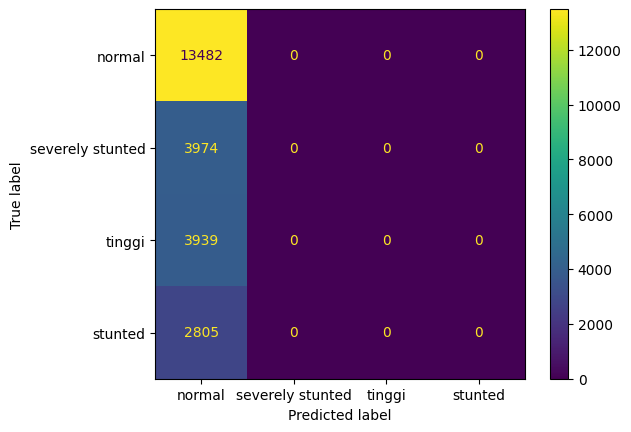

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

predicted = model.predict(X_test)

predicted = np.argmax(predicted, axis=1)

confusion_matrix = metrics.confusion_matrix(y_test, predicted)

confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'severely stunted', 'tinggi', 'stunted'])

confusion_matrix_display.plot()

plt.show()

### LTSM Accuracy

In [22]:
metrics_accuracy = metrics.accuracy_score(y_test, predicted) * 100
metrics_precision = metrics.precision_score(y_test, predicted, average='weighted', zero_division=0) * 100
metrics_recall = metrics.recall_score(y_test, predicted, average='weighted') * 100
metrics_f1_score = metrics.f1_score(y_test, predicted, average='weighted') * 100

print(f"Metrics Accuracy : {metrics_accuracy:.2f}%")
print(f"Metrics Precision : {metrics_precision:.2f}%")
print(f"Metrics Recall : {metrics_recall:.2f}%")
print(f"Metrics F1 Score : {metrics_f1_score:.2f}%")

Metrics Accuracy : 55.71%
Metrics Precision : 31.04%
Metrics Recall : 55.71%
Metrics F1 Score : 39.86%


## K-Means

### Importing local packages

In [23]:
from sklearn.cluster import KMeans

### Re-mapping dataframe

In [24]:
new_df = df.copy(deep=True)

gender = {'perempuan':0, 'laki-laki':1}

result = {
    'normal' : 0,
    'severely stunted' : 1,
    'tinggi' : 2,
    'stunted' : 3
}

new_df['Jenis Kelamin'] = new_df['Jenis Kelamin'].map(gender)
new_df["Status Gizi"] = new_df['Status Gizi'].map(result)
# new_df['Umur (bulan)'] = new_df['Umur (bulan)'].map(lambda x: int(x/10))
# new_df["Tinggi Badan (cm)"] = new_df["Tinggi Badan (cm)"].map(lambda x: int(x/10))

x = new_df['Umur (bulan)']
y = new_df['Tinggi Badan (cm)']
z = new_df['Jenis Kelamin']

classes = new_df['Status Gizi']

### Clustering Data with KMeans

In [25]:
columns = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Jenis Kelamin']
X = new_df[columns]
y = new_df['Status Gizi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_norm = preprocessing.normalize(X_train)

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
kmeans.fit(X_train_norm)

KMeans(n_clusters=4, random_state=0)

### Visualizing and constructing scatter plot for K- Means

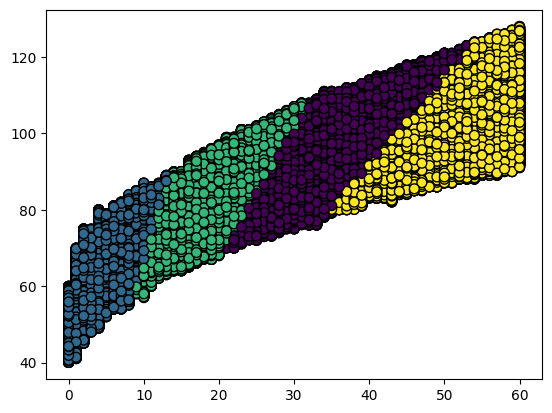

In [26]:
plt.scatter(X_train['Umur (bulan)'], X_train['Tinggi Badan (cm)'], c=kmeans.labels_, edgecolors='k', s=50)
plt.show()

### K-Means Data Prediction

/home/samuel/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


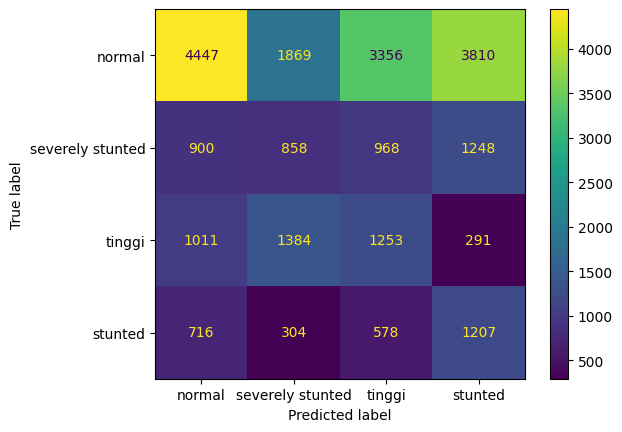

In [27]:
predicted = kmeans.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, predicted)

confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'severely stunted', 'tinggi', 'stunted'])

confusion_matrix_display.plot()

plt.show()

### K-Means Accuracy

In [28]:
metrics_accuracy = metrics.accuracy_score(y_test, predicted) * 100
metrics_precision = metrics.precision_score(y_test, predicted, average='weighted') * 100
metrics_recall = metrics.recall_score(y_test, predicted, average='weighted') * 100
metrics_f1_score = metrics.f1_score(y_test, predicted, average='weighted') * 100

print(f"Metrics Accuracy : {metrics_accuracy:.2f}%")
print(f"Metrics Precision : {metrics_precision:.2f}%")
print(f"Metrics Recall : {metrics_recall:.2f}%")
print(f"Metrics F1 Score : {metrics_f1_score:.2f}%")

Metrics Accuracy : 32.09%
Metrics Precision : 43.66%
Metrics Recall : 32.09%
Metrics F1 Score : 34.49%


## Logistic Regression

### Importing local packages

In [29]:
from sklearn import linear_model
from scipy.special import expit

### Re-mapping dataframe

In [30]:
new_df = df.copy(deep=True)

gender = {'perempuan':0, 'laki-laki':1}

result = {
    'normal' : 0,
    'severely stunted' : 1,
    'tinggi' : 2,
    'stunted' : 3
}

new_df['Jenis Kelamin'] = new_df['Jenis Kelamin'].map(gender)
new_df["Status Gizi"] = new_df['Status Gizi'].map(result)
new_df['Umur (bulan)'] = new_df['Umur (bulan)'].map(lambda x: int(x/10))
new_df["Tinggi Badan (cm)"] = new_df["Tinggi Badan (cm)"].map(lambda x: int(x/10))

x = new_df['Umur (bulan)'].to_numpy()
y = new_df['Tinggi Badan (cm)'].to_numpy()
z = new_df['Jenis Kelamin'].to_numpy()

classes = new_df['Status Gizi']

### Constructing logistic regression

In [31]:
columns = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Jenis Kelamin']
X = new_df[columns]
y = new_df['Status Gizi']

logr = linear_model.LogisticRegression(max_iter=len(X))
logr.fit(X, y, sample_weight=None)

LogisticRegression(max_iter=120999)

### Logistic Regression Data Prediction

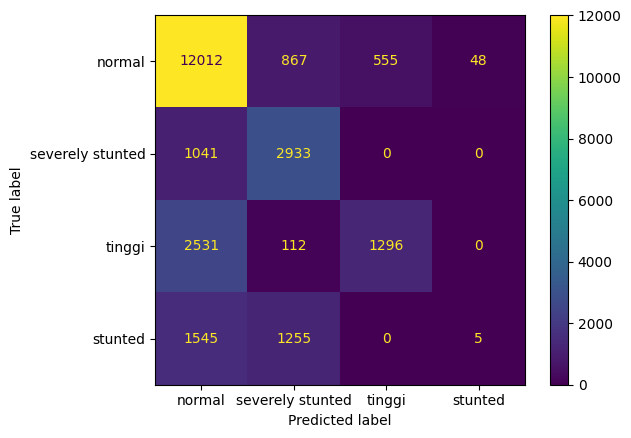

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

predicted = logr.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, predicted)

confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'severely stunted', 'tinggi', 'stunted'])

confusion_matrix_display.plot()

plt.show()

### Logistic Regression Prediction Visualization

24200
24200


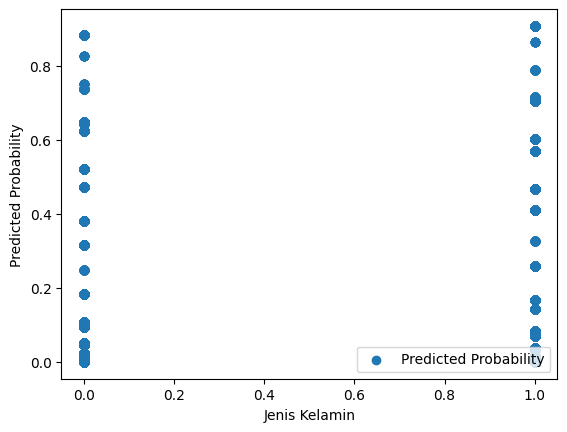

In [33]:
predicted_probability = logr.predict_proba(X_test)[:, 1]

print(len(X_test))
print(len(predicted_probability))

plt.figure(1)
plt.clf()
plt.scatter(X_test.to_numpy()[:, 2], predicted_probability, label='Predicted Probability')

plt.xlabel('Jenis Kelamin')
plt.ylabel('Predicted Probability')
plt.legend(loc='lower right')

plt.show()

### Logistic Regression Accuracy

In [34]:
metrics_accuracy = metrics.accuracy_score(y_test, predicted) * 100
metrics_precision = metrics.precision_score(y_test, predicted, average='weighted',zero_division=0) * 100
metrics_recall = metrics.recall_score(y_test, predicted, average='weighted') * 100
metrics_f1_score = metrics.f1_score(y_test, predicted, average='weighted') * 100

print(f"Metrics Accuracy : {metrics_accuracy:.2f}%")
print(f"Metrics Precision : {metrics_precision:.2f}%")
print(f"Metrics Recall : {metrics_recall:.2f}%")
print(f"Metrics F1 Score : {metrics_f1_score:.2f}%")

Metrics Accuracy : 67.13%
Metrics Precision : 60.88%
Metrics Recall : 67.13%
Metrics F1 Score : 61.59%


## Naive Bayes

### Importing local packages

In [35]:
from sklearn.naive_bayes import GaussianNB

### Re-mapping dataframe

In [36]:
new_df = df.copy(deep=True)

gender = {'perempuan':0, 'laki-laki':1}

result = {
    'normal' : 0,
    'severely stunted' : 1,
    'tinggi' : 2,
    'stunted' : 3
}

new_df['Jenis Kelamin'] = new_df['Jenis Kelamin'].map(gender)
new_df["Status Gizi"] = new_df['Status Gizi'].map(result)
new_df['Umur (bulan)'] = new_df['Umur (bulan)']
new_df["Tinggi Badan (cm)"] = new_df["Tinggi Badan (cm)"]

x = new_df['Umur (bulan)'].to_numpy()
y = new_df['Tinggi Badan (cm)'].to_numpy()
z = new_df['Jenis Kelamin'].to_numpy()

classes = new_df['Status Gizi']

### Constructing Naive Bayes Model

In [37]:
columns = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Jenis Kelamin']

X = new_df[columns]
y = new_df['Status Gizi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

GaussianNB()

### Naive Bayes Data Prediction

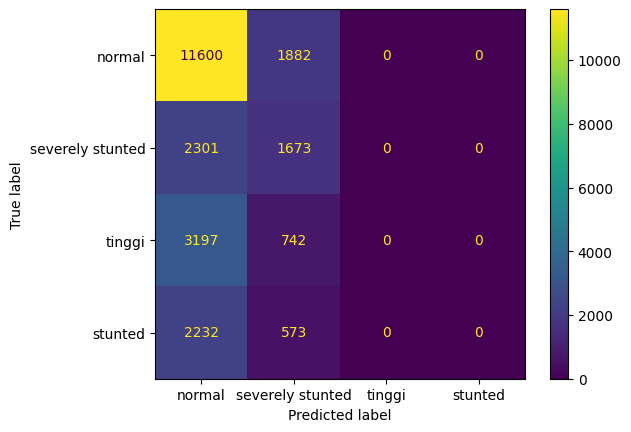

In [38]:

predicted = naive_bayes.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, predicted)

confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'severely stunted', 'tinggi', 'stunted'])

confusion_matrix_display.plot()

plt.show()

### Naive Bayes Prediction Accuracy

In [39]:
metrics_accuracy = metrics.accuracy_score(y_test, predicted) * 100
metrics_precision = metrics.precision_score(y_test, predicted, average='weighted', zero_division=0) * 100
metrics_recall = metrics.recall_score(y_test, predicted, average='weighted') * 100
metrics_f1_score = metrics.f1_score(y_test, predicted, average='weighted') * 100

print(f"Metrics Accuracy : {metrics_accuracy:.2f}%")
print(f"Metrics Precision : {metrics_precision:.2f}%")
print(f"Metrics Recall : {metrics_recall:.2f}%")
print(f"Metrics F1 Score : {metrics_f1_score:.2f}%")

Metrics Accuracy : 54.85%
Metrics Precision : 39.07%
Metrics Recall : 54.85%
Metrics F1 Score : 45.60%


## Linear Regression

### Importing local packages

In [40]:
from scipy import stats
from sklearn.linear_model import LinearRegression

### Re-mapping dataframe

In [41]:
new_df = df.copy(deep=True)

gender = {'perempuan':0, 'laki-laki':1}

result = {
    'normal' : 0,
    'severely stunted' : 1,
    'tinggi' : 2,
    'stunted' : 3
}

new_df['Jenis Kelamin'] = new_df['Jenis Kelamin'].map(gender)
new_df["Status Gizi"] = new_df['Status Gizi'].map(result)
# new_df['Umur (bulan)'] = new_df['Umur (bulan)'].map(lambda x: int(x/10))
# new_df["Tinggi Badan (cm)"] = new_df["Tinggi Badan (cm)"].map(lambda x: int(x/10))

x = new_df['Umur (bulan)'].to_numpy()
y = new_df['Tinggi Badan (cm)'].to_numpy()
z = new_df['Jenis Kelamin'].to_numpy()

classes = new_df['Status Gizi']

### Determining slope, etc.

In [42]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

### Constructing the linear regression

In [43]:
columns = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Jenis Kelamin']

X = new_df[columns]
y = new_df['Status Gizi']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Linear Regression Data Prediction

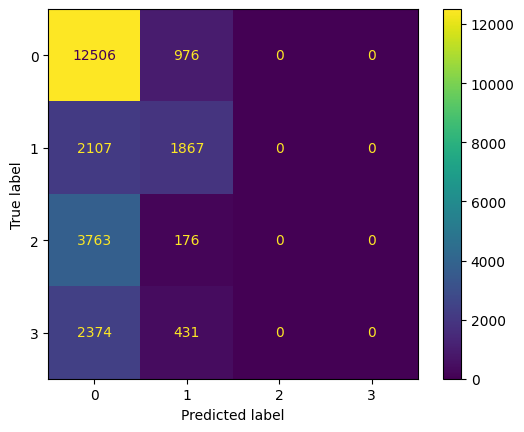

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

predicted = model.predict(X_test)


# Convert continuous targets to categorical targets
label_encoder = preprocessing.LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
predicted_encoded = label_encoder.transform(predicted)

# Calculate confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_encoded, predicted_encoded)

# Display confusion matrix
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=label_encoder.classes_)

confusion_matrix_display.plot()

plt.show()

### Linear Regression Accuracy

In [45]:
metrics_accuracy = metrics.accuracy_score(y_test_encoded, predicted_encoded) * 100
metrics_precision = metrics.precision_score(y_test_encoded, predicted_encoded, average='weighted', zero_division=0) * 100
metrics_recall = metrics.recall_score(y_test_encoded, predicted_encoded, average='weighted') * 100
metrics_f1_score = metrics.f1_score(y_test_encoded, predicted_encoded, average='weighted') * 100

print(f"Metrics Accuracy : {metrics_accuracy:.2f}%")
print(f"Metrics Precision : {metrics_precision:.2f}%")
print(f"Metrics Recall : {metrics_recall:.2f}%")
print(f"Metrics F1 Score : {metrics_f1_score:.2f}%")

Metrics Accuracy : 59.39%
Metrics Precision : 42.46%
Metrics Recall : 59.39%
Metrics F1 Score : 48.97%
